### CS-215 Assignment 2
### Problem 3 (Fitting Data)
1. Abhi Jain - 23b0903
2. Anushka Singhal - 23b0928
3. Sabil Ahmed - 23b1057

In [395]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve                                                               
from scipy.stats import binom, gamma, norm
import math as m

In [396]:
#The data is in file 3.data
data = np.loadtxt('3.data')

### Task A
Calculating first and second moments, formula for the $i^{th}$ moment is given by:
$$\mu _i = \frac{1}{n} \sum_{j=1}^n x_j^i$$

In [397]:
#calculating the mean or the first moment
first_moment = np.mean(data)
print('mu_1:',first_moment)

#calculating the second moment
second_moment = np.mean(data**2)
print('mu_2:',second_moment)

mu_1: 6.496145618324817
mu_2: 46.554361807879815


### Task B
Plotting a histogram from the data and guessing the possible distribution

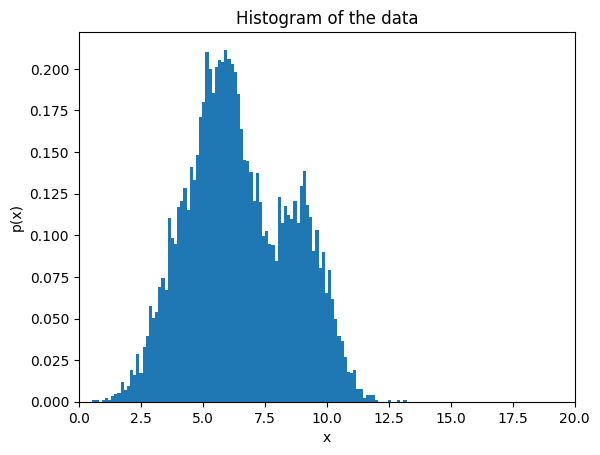

In [398]:
no_of_bins = 100
#for the histogram x axis to be from 0 to 20
plt.hist(data, bins=no_of_bins, density=True)
plt.xlim(0,20)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Histogram of the data')
plt.savefig('../images/3b.png')

The guess for mean for normal distribution from histogram is in between 6 and 8 more towards side of 6. So, my guess is 6.7.

### Task C
For binomial distribution $X ~ \text{Bin}(n,p)$. We have,
$$\mu_1^{\text{Bin}} = n\cdot p$$
$$\text{Var}(X) = E[X^2] - E[X]^2 = n \cdot p \cdot (1-p)$$
This gives
$$\mu_2^{\text{Bin}} = \text{Var}(x) + (\mu_1^\text{Bin})^2 = n^2\cdot p^2 + n\cdot p\cdot(1-p)$$

In [399]:
def equations(vars):
    n, p = vars
    eq1 = n*p - first_moment
    eq2 = (n*p)**2 + n*p*(1-p) - second_moment
    return [eq1, eq2]

n, p = fsolve(equations, (10, 0.5))
n = round(n)
print("n = ",n," and p = ",p)

n =  20  and p =  0.3296865296375572


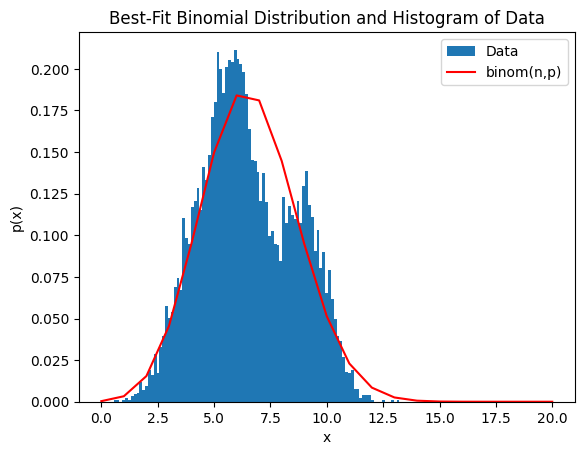

In [400]:
#plot the histogram of the data
plt.hist(data, bins=no_of_bins, density=True, label = 'Data')

x = np.linspace(0, n, n + 1)
binom_pmf = binom.pmf(x, n, p)

# Plot the binomial distribution
plt.plot(x, binom_pmf, 'red', label='binom(n,p)')

# Add labels and title
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Best-Fit Binomial Distribution and Histogram of Data')
plt.legend()
plt.savefig('../images/3c.png')


### Task D
We have derived $\mu_1^\text{Gam} = k\theta$ and $\mu_2^\text{Gam} = k(k+1)\theta^2$ in the report.

In [401]:
def equations(vars):
    k, th = vars
    eq1 = k*th - first_moment
    eq2 = (k)*(k+1)*th*th - second_moment
    return [eq1, eq2]

k, th = fsolve(equations, (10, 1))
print("k = ",n," and theta = ",th)

k =  20  and theta =  0.6703134703624472


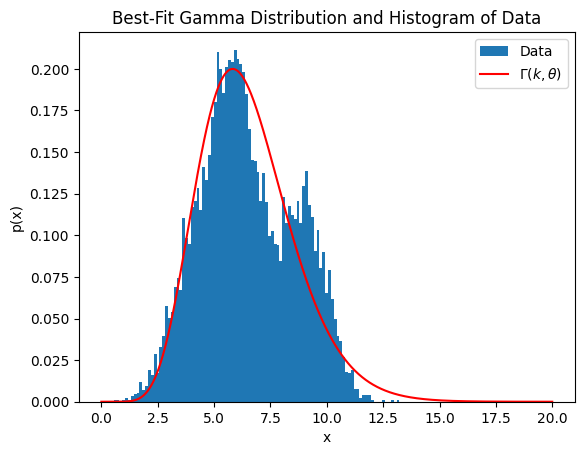

In [402]:
#plot the histogram of the data
plt.hist(data, bins=no_of_bins, density=True, label = 'Data')

x = np.linspace(0, 20.0, 1000)
gamma_pdf = gamma.pdf(x, k, scale=th)

# Plot the best-fit gamma distribution
plt.plot(x, gamma_pdf, 'red', label=r"$\Gamma (k,\theta)$")

# Add labels and title
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Best-Fit Gamma Distribution and Histogram of Data')
plt.legend()
plt.savefig('../images/3d.png')


### Task E
Given a dataset $S$ and a choice of parameter $\lambda = \lambda_0 $ for a family of distributions $P[\lambda]$, parameterized by $\lambda$, define the likelihood of $\lambda_0$ by
$$\mathcal{L}(\theta|S) = P_{\lambda_0}[S] = \prod_{i=1}^nP_{\lambda_0}[X_i]$$
The average log-likelihood is typically calculated for parameter $\theta$ and dataset $S$ is given as:
$$l(\lambda_0|S) = \frac{1}{n} log\mathcal{L}(\theta|S)$$

In [403]:
log_like_binomial = np.mean(binom.logpmf(np.round(data), n, p))  
log_like_gamma = np.mean(gamma.logpdf(data, k, scale=th)) 

print("Log likelihood of the best-fit binomial distribution: ", log_like_binomial)
print("Log likelihood of the best-fit gamma distribution: ", log_like_gamma)

if log_like_binomial > log_like_gamma:
    print("The best-fit distribution is the binomial distribution.")
else:
    print("The best-fit distribution is the gamma distribution.")

Log likelihood of the best-fit binomial distribution:  -2.157068115434675
Log likelihood of the best-fit gamma distribution:  -2.1608217722066265
The best-fit distribution is the binomial distribution.


### Task F
The GMM distribution is as follows:
$$P(x) = \frac{1}{\sqrt{2\pi}} \left[ p_1 \exp\left(-\frac{(x - \mu_1)^2}{2\sigma_1^2}\right) + p_2 \exp\left(-\frac{(x - \mu_2)^2}{2\sigma_2^2}\right) \right]$$
Here, are the first four moments:
$$\text{eq1: } p_1 \mu_1 + p_2 \mu_2 = \mu_1^\text{GMM}$$
$$\text{eq2: } p_1 (\mu_1^2 + \sigma_1^2) + p_2 (\mu_2^2 + \sigma_2^2) = \mu_2^\text{GMM}$$
$$\text{eq3: } p_1 (\mu_1^3 + 3\mu_1\sigma_1^2) + p_2 (\mu_2^3 + 3\mu_2\sigma_2^2) = \mu_3^\text{GMM}$$
$$\text{eq4: } p_1 (\mu_1^4 + 6\mu_1^2\sigma_1^2 + 3\sigma_1^4) + p_2 (\mu_2^4 + 6\mu_2^2\sigma_2^2 + 3\sigma_2^4) = \mu_4^\text{GMM}$$


In [404]:
#calculating the first four moments
mu_1 = np.mean(data)
mu_2 = np.mean(data**2)
mu_3 = np.mean(data**3)
mu_4 = np.mean(data**4)

def equations(vars):
    p1, n1, p2, n2 = vars
    eq1 = p1*n1 + p2*n2 - mu_1
    eq2 = p1*(n1**2 + 1) + p2*(n2**2 + 1) - mu_2
    eq3 = p1*(n1**3 + 3*n1) + p2*(n2**3 + 3*n2) - mu_3
    eq4 = p1*(n1**4 + 6*n1**2 + 3) + p2*(n2**4 + 6*n2**2 + 3) - mu_4
    return [eq1, eq2, eq3, eq4]

p1,n1,p2,n2 = fsolve(equations, (0.5, 10, 0.4, 20))
print("p1 = ",p1," and n1 = ",n1)
print("p2 = ",p2," and n2 = ",n2)

p1 =  0.6118740341612672  and n1 =  5.129607694288399
p2 =  0.38264565119245014  and n2 =  8.774363054420633


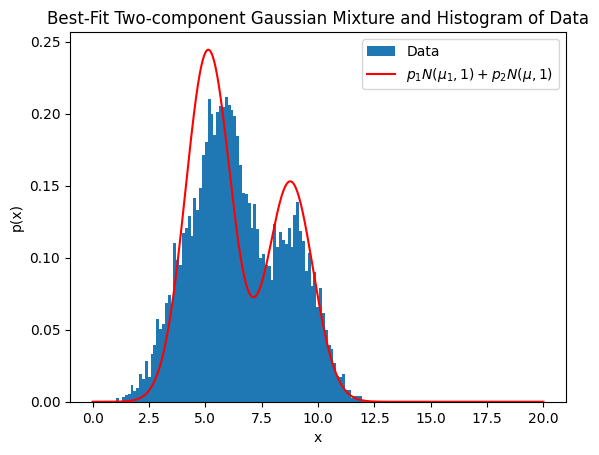

In [405]:
#plot the histogram of the data
plt.hist(data, bins=no_of_bins, density=True, label = 'Data')

x = np.linspace(0, 20.0, 1000)
#plotting two-component gaussian mixture
pdf1 = p1*norm.pdf(x, n1,1)
pdf2 = p2*norm.pdf(x, n2,1)
norm_pdf = pdf1 + pdf2

# Plot the best-fit Two-component Gaussian Mixture distribution
plt.plot(x, norm_pdf, 'red', label=r"$p_1N(\mu_1,1)+p_2N(\mu,1)$")

# Add labels and title
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Best-Fit Two-component Gaussian Mixture and Histogram of Data')                                             
plt.legend()
plt.savefig('../images/3f.png')                                                                                                 

In [406]:
log_like_norm = np.mean(np.log(norm.pdf(data, n1, 1)*p1 + norm.pdf(data, n2, 1)*p2))

print("Log likelihood of the best-fit two-component gaussian distribution: ", log_like_norm)

if log_like_norm > log_like_gamma and log_like_norm > log_like_binomial:
    print("The best-fit distribution is the two-component gaussian distribution.")

Log likelihood of the best-fit two-component gaussian distribution:  -2.183038744911406


### Teaser
Using 6 Variables, by making sigma1 and sigma2 alson variable. For this purpose we required 6 equations.

In [407]:
#calculating the first four moments
mu_1 = np.mean(data)
mu_2 = np.mean(data**2)
mu_3 = np.mean(data**3)
mu_4 = np.mean(data**4)
mu_5 = np.mean(data**5)
mu_6 = np.mean(data**6)

def equations(vars):
    p1, n1, p2, n2, sig1, sig2= vars
    eq1 = p1*n1 + p2*n2 - mu_1
    eq2 = p1*(n1**2 + sig1**2) + p2*(n2**2 + sig2**2) - mu_2
    eq3 = p1*(n1**3 + 3*n1*(sig1**2)) + p2*(n2**3 + 3*n2*(sig2**2)) - mu_3
    eq4 = p1*(n1**4 + 6*(n1**2)*(sig1**2) + 3*(sig1**4)) + p2*(n2**4 + 6*(n2**2)*(sig2**2) + 3*(sig2**4)) - mu_4
    eq5 = p1*(n1**5 + 10*n1**3*sig1**2 + 15*n1*sig1**4) + p2*(n2**5 + 10*n2**3*sig2**2 + 15*n2*sig2**4) - mu_5
    eq6 = p1*(n1**6 + 15*n1**4*sig1**2 + 45*n1**2*sig1**4 + 15*sig1**6) + p2*(n2**6 + 15*n2**4*sig2**2 + 45*n2**2*sig2**4 + 15*sig2**6) - mu_6
    return [eq1, eq2, eq3, eq4, eq5, eq6]

p1,n1,p2,n2, sig1, sig2 = fsolve(equations, (0.5, 6, 0.4, 10, 0.5 ,0.7))
print("p1 = ",p1,", n1 = ",n1,", sig1 = ",sig1)
print("p2 = ",p2,", n2 = ",n2,", sig2 = ",sig2)

p1 =  0.7544987644483389 , n1 =  5.61551680544903 , sig1 =  1.5395974129232748
p2 =  0.2461092217321142 , n2 =  9.179847512339403 , sig2 =  0.9751223502251171


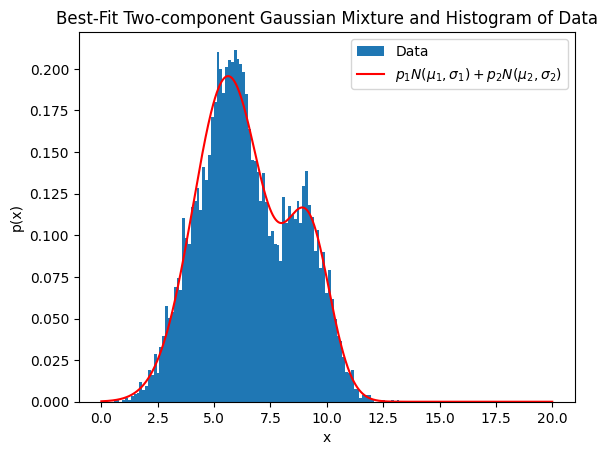

In [408]:
#plot the histogram of the data
plt.hist(data, bins=no_of_bins, density=True, label = 'Data')

x = np.linspace(0, 20.0, 1000)
#plotting two-component gaussian mixture
pdf1_s = p1*norm.pdf(x, n1, sig1)
pdf2_s = p2*norm.pdf(x, n2, sig2)
norm_pdf_s = pdf1_s + pdf2_s

# Plot the best-fit  distribution
plt.plot(x, norm_pdf_s, 'red', label=r"$p_1N(\mu_1,\sigma_1)+p_2N(\mu_2,\sigma_2)$")

# Add labels and title
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Best-Fit Two-component Gaussian Mixture and Histogram of Data')                                             
plt.legend()                                                                                                               

In [409]:
log_like_norm_s = np.mean(np.log(norm.pdf(data, n1, sig1)*p1 + norm.pdf(data, n2, sig2)*p2))
print("Log likelihood of the best-fit two-component gaussian distribution: ", log_like_norm_s)


Log likelihood of the best-fit two-component gaussian distribution:  -2.11464787612961
